In [2]:
import pandas as pd 
from bondnet.dataset.mg_barrier import process_species_rdkit
from pymatgen.core import Lattice, Structure, Molecule

path_mg_data = "/home/santiagovargas/Documents/Dataset/mg_dataset/"
path_json = path_mg_data + "20220613_reaction_data.json"
mg_df = pd.read_json(path_json)

/home/santiagovargas/anaconda3/envs/bondnet/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using backend: pytorch


239 912 502 629 719


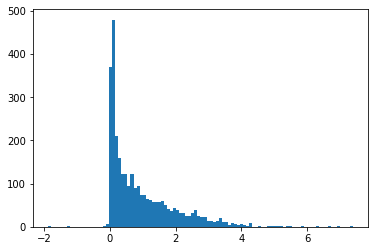

In [20]:
import matplotlib.pyplot as plt 
plt.hist(mg_df['dE_barrier'].tolist(), bins = 100)

bin_1, bin_2, bin_3, bin_4, bin_5, bin_6 = 0, 0, 0, 0, 0, 0
for value in mg_df['dE_barrier'].tolist():
    if(value <= 0.04): bin_1 += 1
    elif(value < 0.3  and value > 0.04): bin_2 += 1
    elif(value < 0.7  and value > 0.3): bin_3 += 1
    elif(value < 1.5  and value > 0.7): bin_4 += 1
    else: bin_5 += 1
print(bin_1, bin_2, bin_3, bin_4, bin_5)

In [87]:
#mg_df[mg_df['reactant_id'] == 62707]
#print(len(mg_df.iloc[0]['product_molecule_graph']['graphs']['nodes']))
#print(mg_df.iloc[0]['product_molecule_graph']['graphs']['adjacency'])
bonds_net = []
for ind, i in enumerate(mg_df.iloc[0]['product_molecule_graph']['graphs']['adjacency']):
    for j in i: 
        bonds_net.append([ind, j['id']]) 
        
print(bonds_net)
print(mg_df.iloc[0]['product_bonds'])

[[0, 1], [1, 2], [1, 4], [2, 7], [2, 3], [2, 8], [3, 9], [3, 4], [3, 5], [4, 11], [4, 10], [5, 6]]
[[0, 1], [1, 2], [1, 4], [2, 7], [2, 3], [2, 8], [3, 9], [3, 4], [3, 5], [4, 11], [4, 10], [5, 6]]


In [3]:
bond_count = 0
for ind, row in mg_df.iterrows():
    if(len(row['bonds_broken']) == 1):bond_count+=1
    #elif(len(row['bonds_broken_nometal']) == 1):bond_count+=1
    #elif(len(row['bonds_formed_nometal'])!=1 ):bond_count+=1
    elif(len(row['bonds_formed'])!= 1):bond_count+=1
    else:bond_count+=0
print(bond_count / ind)
print(mg_df.shape)

0.772
(3001, 60)


In [8]:
import pandas as pd

from bondnet.utils import int_atom, xyz2mol
from bondnet.core.molwrapper import rdkit_mol_to_wrapper_mol
atoms = [int_atom(atom['name']) for atom in mg_df.iloc[0]['reactant_molecule_graph']["molecule"]["sites"]]
xyz_coordinates = [i["xyz"] for i in mg_df.iloc[0]['reactant_molecule_graph']["molecule"]["sites"]]
charge = int(mg_df.iloc[0]['charge'])
mol = xyz2mol(atoms = atoms, 
                coordinates = xyz_coordinates, 
                charge = charge,
                )
print(rdkit_mol_to_wrapper_mol(mol[0], identifier= str(mg_df.iloc[0]["reactant_id"])))

-8228.114932717173
-0.0005337600468919845
-0.0005337600468910001
0.0922205206061335
0.092220520606133
-8226.321824156197
62707_C5H5N1O1


In [5]:
from bondnet.core.molwrapper import create_wrapper_mol_from_atoms_and_bonds
from bondnet.core.reaction import Reaction 
from bondnet.core.reaction_collection import ReactionCollection

row = mg_df.iloc[1]
barrier = row["dE_barrier"]
species = [i['name'] for i in row['product_molecule_graph']["molecule"]["sites"]]
coords = [i["xyz"] for i in row['product_molecule_graph']["molecule"]["sites"]]
bonds = row['product_bonds']

charge = row['charge']
free_energy = row['product_free_energy']
id = str(row["reactant_id"])

product = create_wrapper_mol_from_atoms_and_bonds(
    species, coords, bonds, charge=0, free_energy=free_energy, identifier=id,
)


species = [i['name'] for i in row['reactant_molecule_graph']["molecule"]["sites"]]
coords = [i["xyz"] for i in row['reactant_molecule_graph']["molecule"]["sites"]]
bonds = row['reactant_bonds']
charge = row['charge']

free_energy = row['reactant_free_energy']
id = str(row["product_id"])
reactant = create_wrapper_mol_from_atoms_and_bonds(
    species, coords, bonds, charge=0, free_energy=free_energy, identifier=id,
)

id = [i for i in row["reaction_id"].split("-")]
id = int(id[0] + id[1] + id[2])
broken_bond = row['bonds_formed']
if(broken_bond == []):broken_bond=None
rxn = Reaction(
            reactants = [reactant], 
            products=[product], 
            free_energy= barrier,
            broken_bond = broken_bond,
            identifier = id
            )

reactant_bond_list = list(reactant.bonds.keys())
product_bond_list = list(product.bonds.keys())
reactant_bond_list.sort()
product_bond_list.sort()


#print(rxn)
#extractor = ReactionCollection([rxn])
#extractor.create_regression_dataset_reaction_network_simple(
#    struct_file=path_mg_data + "mg_struct_bond_rgrn.sdf",
#    label_file=path_mg_data + "mg_label_bond_rgrn.yaml",
#    feature_file=path_mg_data + "mg_feature_bond_rgrn.yaml"
#)
type(reactant.mol_graph)

pymatgen.analysis.graphs.MoleculeGraph

In [33]:
from pymatgen.analysis.graphs import MoleculeGraph
from bondnet.core.reaction import Reaction

reactant = MoleculeGraph(mg_df.iloc[1]['reactant_molecule_graph']['molecule'])
#product = MoleculeGraph()

print(mg_df.iloc[1]['reactant_molecule_graph']['molecule'])
print(len(mg_df.iloc[1]['reactant_molecule_graph']['molecule']))

#row['reactant_bonds']
#rxn = Reaction(reactants = ,
#                products = ,
#                broken_bond = mg_df.iloc[1]['bonds_broken'],
#                free_energy = mg_df.iloc[1]['dE_barrier'],
#                identifier = mg_df.iloc[1]['reaction_id'])

AttributeError: 'NoneType' object has no attribute 'get'

In [13]:
from bondnet.utils import to_path, int_atom, xyz2mol
from bondnet.core.molwrapper import rdkit_mol_to_wrapper_mol, create_wrapper_mol_from_atoms_and_bonds

for ind, row in mg_df.head(10).iterrows():
  bonds = row['reactant_bonds']
  species_reactant = [int_atom(i['name']) for i in row['reactant_molecule_graph']["molecule"]["sites"]]
  coords_reactant = [i["xyz"] for i in row['reactant_molecule_graph']["molecule"]["sites"]]
  charge = row['charge']
  id = str(row["reactant_id"])
  free_energy = row['product_free_energy']
  barrier = row["dE_barrier"]
  id = str(row["reactant_id"])

  # xyz mol / rdkit
  reactant_mol = xyz2mol(atoms = species_reactant, 
      coordinates = coords_reactant, 
      charge = charge,
      )
  reactant_wrapper = rdkit_mol_to_wrapper_mol(reactant_mol[0],
      charge = charge,
      free_energy=free_energy, 
      identifier = id
      )
  reactant_graph_method = create_wrapper_mol_from_atoms_and_bonds(
      species_reactant, coords_reactant, bonds, charge=0, free_energy=free_energy, identifier=id,
  )
  if(len(reactant_wrapper.bonds) != len(reactant_graph_method.bonds)):
    reactant_graph_method.rdkit_mol = reactant_wrapper.rdkit_mol

    
  print(len(reactant_wrapper.bonds))
  print(len(reactant_graph_method.bonds))

10
10
11
11
17
17
8
8
8
8
19
20
3
6
7
7
5
6
12
12


: 

In [16]:
#reactant_structure, reactant_molecule_graph, reactant_bonds, 
#product_structure, product_molecule_graph, product_bonds, 
#transition_state_structure, 
#bonds_broken, bonds_broken_nometal, bonds_formed, bonds_formed_nometal
from tqdm import tqdm 
from bondnet.utils import to_path, int_atom, xyz2mol
from bondnet.core.molwrapper import rdkit_mol_to_wrapper_mol, create_wrapper_mol_from_atoms_and_bonds


element_dict = {"H": 1, "Li": 3, "Be": 4, "B": 5, "C": 6, "N": 7, "O": 8, 
"F": 9, 'Ca': 20, 'Na': 11, 'Cl': 17, 'P':15, 'Mg': 12 }
preserve = 0
for i in tqdm(range(2000)):
    row = mg_df.iloc[i]
    """g_prod = nx.Graph(row["product_bonds"])
    g_react = nx.Graph(row["reactant_bonds"])
    g_prod_2 = nx.Graph(row["product_bonds_nometal"])
    g_react_2 = nx.Graph(row["reactant_bonds_nometal"])
    if(nx_graph_atom_mapping(g_prod, g_react) == None):
        if(nx_graph_atom_mapping(g_prod_2, g_react_2) == None):
            pass
        else: works_count += 1 
    else: works_count += 1"""
    species_reactant = [int_atom(i['name']) for i in row['reactant_molecule_graph']["molecule"]["sites"]]
    species_products = [int_atom(i['name']) for i in row['product_molecule_graph']["molecule"]["sites"]]
    trans_list_temp = list(i['name'] for i in list(row["transition_state_structure"]['sites']))
    trans_list = [element_dict[i] for i in trans_list_temp]
    
    if(species_products == trans_list): preserve += 1
    #if(list_xyz == coords_reactant): preserve += 1

print(preserve)



100%|██████████| 2000/2000 [00:00<00:00, 9615.40it/s]

2000


In [7]:
from rdkit import Chem
mol = Chem.MolFromSmiles("CCC")
mol.GetAtomWithIdx(1).GetAtomicNum()

6

In [12]:
from rdkit import Chem 
from bondnet.data.utils import get_dataset_species
from bondnet.data.utils import get_dataset_species_from_json
path_mg_data = "/home/santiagovargas/Documents/Dataset/mg_dataset/"
path_json = path_mg_data + "20220613_reaction_data.json"

get_dataset_species_from_json(path_json)

['C', 'Cl', 'F', 'H', 'Li', 'Mg', 'N', 'O', 'P']

In [42]:


class BondAsNodeFeaturizerFull(BondFeaturizer):
    """
    Featurize all bonds in a molecule.

    The bond indices will be preserved, i.e. feature i corresponds to atom i.
    The number of features will be equal to the number of bonds in the molecule,
    so this is suitable for the case where we represent bond as graph nodes.

    See Also:
        BondAsEdgeBidirectedFeaturizer
    """

    def __init__(
        self,
        length_featurizer=None,
        length_featurizer_args=None,
        dative=False,
        dtype="float32",
    ):
        super(BondAsNodeFeaturizerFull, self).__init__(
            length_featurizer, length_featurizer_args, dtype
        )
        self.dative = dative

    



Index(['_id', 'builder_meta', 'charge', 'spin_multiplicity', 'natoms',
       'elements', 'nelements', 'composition', 'formula_alphabetical',
       'chemsys', 'symmetry', 'reaction_id', 'reactant_id', 'product_id',
       'transition_state_id', 'deprecated', 'reactant_structure',
       'reactant_molecule_graph', 'reactant_molecule_graph_nometal',
       'reactant_bonds', 'reactant_bonds_nometal', 'reactant_energy',
       'reactant_zpe', 'reactant_enthalpy', 'reactant_entropy',
       'reactant_free_energy', 'product_structure', 'product_molecule_graph',
       'product_molecule_graph_nometal', 'product_bonds',
       'product_bonds_nometal', 'product_energy', 'product_zpe',
       'product_enthalpy', 'product_entropy', 'product_free_energy',
       'transition_state_structure', 'transition_state_energy',
       'transition_state_zpe', 'transition_state_enthalpy',
       'transition_state_entropy', 'transition_state_free_energy', 'dE', 'dH',
       'dS', 'dG', 'dE_barrier', 'dH_barri

In [3]:
def __call__(mol, **kwargs):
        """
        Parameters
        ----------
        mol : pandas series with 'bond', 'pymatgen'/'site'/'molecule', and 
        'composition' columns

        Returns
        -------
            Dictionary for bond features
        """
        dative = True

        if dative:
            num_feats = 12
        else:
            num_feats = 11

        columns = mol.keys()

        if 'reactant_bonds' in columns: 
            bond_key = "reactant_bonds"
            graph_key = "reactant_molecule_graph"
        else: 
            bond_key = "product_bonds"
            graph_key = "product_molecule_graph"


        # Note, this needs to be set such that single atom molecule works

        num_bonds = len(mol['bond_key'])
        # need to add back 

        #if num_bonds == 0:
        #    ft = [0.0 for _ in range(num_feats)]
        #    if self.length_featurizer:
        #        ft += [0.0 for _ in range(len(self.length_featurizer.feature_name))]
        #    feats = [ft]
        # add back 
        #else:

            ring = mol.GetRingInfo()
            allowed_ring_size = [3, 4, 5, 6, 7]

            feats = []
            for u in range(num_bonds):
                bond = mol.GetBondWithIdx(u)

                ft = [
                    int(bond.IsInRing()),
                    int(bond.GetIsConjugated()),
                ]
                for s in allowed_ring_size:
                    ft.append(ring.IsBondInRingOfSize(u, s))

                allowed_bond_type = [
                    Chem.rdchem.BondType.SINGLE,
                    Chem.rdchem.BondType.DOUBLE,
                    Chem.rdchem.BondType.TRIPLE,
                    Chem.rdchem.BondType.AROMATIC,
                    # Chem.rdchem.BondType.IONIC,
                ]
                if self.dative:
                    allowed_bond_type.append(Chem.rdchem.BondType.DATIVE)
                ft += one_hot_encoding(bond.GetBondType(), allowed_bond_type)

                if self.length_featurizer:
                    at1 = bond.GetBeginAtomIdx()
                    at2 = bond.GetEndAtomIdx()
                    atoms_pos = mol.GetConformer().GetPositions()
                    bond_length = np.linalg.norm(atoms_pos[at1] - atoms_pos[at2])
                    ft += self.length_featurizer(bond_length)

                feats.append(ft)

        feats = torch.tensor(feats, dtype=getattr(torch, self.dtype))
        self._feature_size = feats.shape[1]
        self._feature_name = (
            ["in_ring", "conjugated"]
            + ["ring size"] * 5
            + ["single", "double", "triple", "aromatic"]
        )
        if self.dative:
            self._feature_name += ["dative"]
        if self.length_featurizer:
            self._feature_name += self.length_featurizer.feature_name

        return {"feat": feats}

{'O': 1.0, 'C': 5.0, 'N': 1.0, 'H': 5.0}


NameError: name 'num_atoms' is not defined

12.011

In [11]:

mg_df.iloc[0]['product_bonds']


[[0, 1],
 [1, 2],
 [1, 4],
 [2, 7],
 [2, 3],
 [2, 8],
 [3, 9],
 [3, 4],
 [3, 5],
 [4, 11],
 [4, 10],
 [5, 6]]